In [95]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math
import scipy.stats as stats

In [99]:

def Boxplot (data):
    
    data = np.sort(data)
    q1_indx = round(0.25*len(data))
    q2_indx = round(0.5*len(data))
    q3_indx = round(0.75*len(data))

    q1 = data[q1_indx]
    q2 = data[q2_indx]
    q3 = data[q3_indx]

    iqr = q3 - q1 #Interquartile range

    high_whisker = data[data<=q3+1.5*iqr].max()
    low_whisker = data[data>=q1-1.5*iqr].min()

    outliers = np.array([])
    extreme_outliers = np.array([])

    for point in data:
        if (point<(-3*iqr + q1) or (point > (3*iqr + q3))):
            extreme_outliers = np.append(extreme_outliers, point)
        elif ((point>(-3*iqr + q1) and point<low_whisker) or (point<(3*iqr + q3) and point>high_whisker)):
            outliers = np.append(outliers, point)
            
    with open ('Problem1_results.txt','w+') as f:
        f.write("q1 = " + str(q1) + "\n")
        f.write("q2 = " + str(q2) + "\n")
        f.write("q3 = " + str(q3) + "\n")
        
        f.write("\n" + "Interquartile range = " + str(iqr) + "\n")
        
        f.write("\n" + "Outliers :" + "\n")
        for i in range(len(outliers)):
            f.write("   " + str(outliers[i])+'\n')
        if (outliers.size==0):
            f.write("   None"+"\n")
            
        f.write("\n" + "Extreme outliers :" + "\n")
        for i in range(len(extreme_outliers)):
            f.write("   " + str(extreme_outliers[i])+'\n')
        if (extreme_outliers.size==0):
            f.write("   None"+"\n")
            
        
        
data = np.loadtxt('/home/ghadeer/Downloads/Assignment 2/Data1.txt')        
Boxplot (data)
        
#B=plt.boxplot(data)
#[item.get_ydata()[0] for item in B['whiskers']]
#print(B)

#print (outliers, extreme_outliers)

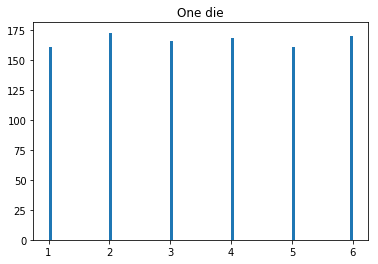

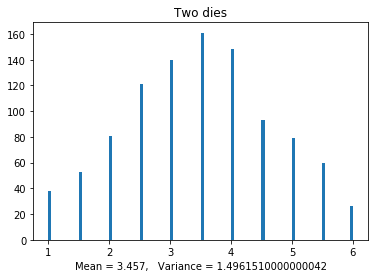

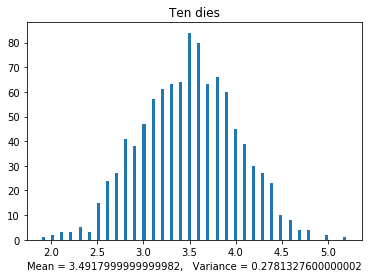

In [98]:

def Verify_Central_Limit_Theorom ():
    One_die = []
    Two_dies = []
    Ten_dies = []

    [One_die.append(random.randint(1,6)) for i in range (1000)]
    plt.hist(One_die, bins=100)
    plt.title("One die")
    plt.savefig("One_die.jpg")
    plt.show()


    [Two_dies.append((random.randint(1,6)+random.randint(1,6))/2) for i in range (1000)]
    mean2dies = sum(Two_dies)/len(Two_dies)
    var2dies = sum((xi - mean2dies)**2 for xi in Two_dies)/len(Two_dies)
    plt.hist(Two_dies, bins=100)
    plt.title("Two dies")
    plt.xlabel("Mean = " + str(mean2dies) + ",   Variance = " + str(var2dies))
    plt.savefig("Two_dies.jpg")
    plt.show()

    for i in range (1000):
        new_value = 0
        for die in range(10):
            new_value += random.randint(1,6)
        new_value/=10
        Ten_dies.append(new_value)
    mean10dies = sum(Ten_dies)/len(Ten_dies)
    var10dies = sum((xi - mean10dies)**2 for xi in Ten_dies)/len(Ten_dies)

    plt.hist(Ten_dies, bins=100)
    plt.title("Ten dies")
    plt.xlabel("Mean = " + str(mean10dies) + ",   Variance = " + str(var10dies))
    plt.savefig("Ten_dies.jpg")
    plt.show()
    
Verify_Central_Limit_Theorom()

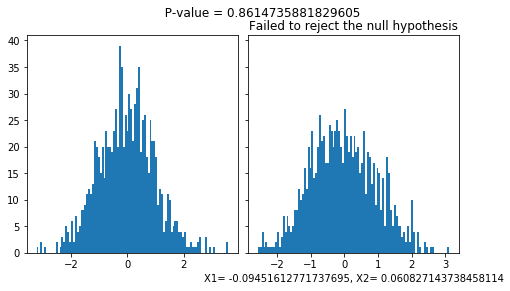

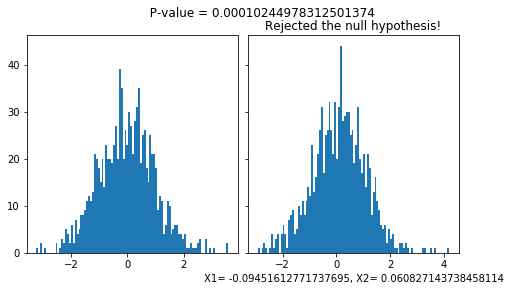

In [123]:
count = 1

def Hypothesis_testing(data1, data2, alpha):
    
    u0= data1.mean() #True mean
    segma = np.std(data1) #True standard deviation

    X = data2.mean() #Sample mean
    n = len(data2)

    z0= (X-u0)/(segma/math.sqrt(n))

    P_value = 2*(1-stats.norm.cdf(abs(z0)))
    
    boundries = [0, 0]
    z_025 = stats.norm.ppf(0.025)
    z_025neg= stats.norm.ppf(1-0.025)
    
    boundries[0]=z_025*(segma/math.sqrt(n))+u0
    boundries[1]=(z)*(segma/math.sqrt(n))+u0
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(data1, bins=100)
    plt.xlabel("X1= " + str(boundries[0]) + ", X2= " + str(boundries[1]))
    if P_value>alpha:
        ax2.set_title("Failed to reject the null hypothesis")
    else:
        ax2.set_title("Rejected the null hypothesis!")
    
    ax2.hist(data2, bins=100)
    plt.subplots_adjust(left=0, right = 1, wspace= 0.05)
    plt.suptitle('          P-value = ' + str(P_value))
    
    global count
    count+=1
    plt.savefig("Testing dataset3-1 with dataset3-{}.jpg".format(count))
    plt.show()
    
#     plt.hist(data1, bins=100)
#     plt.show()
#     plt.hist(data2, bins=100)
#     plt.show()

    Output ={'P-value':P_value, 'X1': boundries[0], 'X2': boundries[1]}
    
    
    return (Output)
    
    
    

data31 = np.loadtxt('/home/ghadeer/Downloads/Assignment 2/Data3-1.txt', delimiter=',')
data32 = np.loadtxt('/home/ghadeer/Downloads/Assignment 2/Data3-2.txt', delimiter=',')
data33 = np.loadtxt('/home/ghadeer/Downloads/Assignment 2/Data3-3.txt', delimiter=',')
alpha = 0.05

Output1 = Hypothesis_testing(data31, data32, alpha)
Output2 = Hypothesis_testing(data31, data33, alpha)


#print (test)
#print(P_value>alpha)


In [94]:
print(data31.mean(), data32.mean(), data33.mean())

-0.032631640951000004 -0.027121968450000006 0.0900255238
